In [1]:
import cv2
import everai
import os
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 4000

/home/filipgrigorov/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/filipgrigorov/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/filipgrigorov/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/filipgrigorov/anaconda3/envs/ml

In [2]:
# Load image by image and see if face by comparing to total images (ir)
df = pd.read_csv('train.csv')

print(df.head(1))

/home/filipgrigorov/anaconda3/envs/ml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (16,17,18,19,20,21,22,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


           name  type  depth  \
0  20200624-010  real    NaN   

                                            scenario ethnicity  \
0  real_euro_male_varying_depth_young_underexpose...      euro   

  unique_scenario                                      full_scenario  \
0    20200624-010  20200624-010/real_euro_male_varying_depth_youn...   

                             full_scenario_with_path  \
0  /media/filipgrigorov/6de1ab69-7e10-4995-95e7-d...   

                                           root_path  triplet_id  ...  \
0  /media/filipgrigorov/6de1ab69-7e10-4995-95e7-d...  82-1044202  ...   

  spoof_open_closed spoof_low_high   glasses  hat noaccessories  scarf hair  \
0               NaN            NaN  dioptric  hat           NaN  scarf  NaN   

  beard hands2face background  
0   NaN        NaN        NaN  

[1 rows x 27 columns]


In [3]:
df["ir_full_path"] = df['root_path'] + df['ir_path']
data = df.iloc[:30000]
s = data.head(1)
print('%s' % s)

           name  type  depth  \
0  20200624-010  real    NaN   

                                            scenario ethnicity  \
0  real_euro_male_varying_depth_young_underexpose...      euro   

  unique_scenario                                      full_scenario  \
0    20200624-010  20200624-010/real_euro_male_varying_depth_youn...   

                             full_scenario_with_path  \
0  /media/filipgrigorov/6de1ab69-7e10-4995-95e7-d...   

                                           root_path  triplet_id  ...  \
0  /media/filipgrigorov/6de1ab69-7e10-4995-95e7-d...  82-1044202  ...   

  spoof_low_high   glasses  hat noaccessories  scarf hair beard hands2face  \
0            NaN  dioptric  hat           NaN  scarf  NaN   NaN        NaN   

  background                                       ir_full_path  
0        NaN  /media/filipgrigorov/6de1ab69-7e10-4995-95e7-d...  

[1 rows x 28 columns]


30000
           name  type  depth  \
0  20200624-010  real    NaN   
1  20200624-010  real    NaN   
2  20200624-010  real    NaN   

                                            scenario ethnicity  \
0  real_euro_male_varying_depth_young_underexpose...      euro   
1  real_euro_male_varying_depth_young_underexpose...      euro   
2  real_euro_male_varying_depth_young_underexpose...      euro   

  unique_scenario                                      full_scenario  \
0    20200624-010  20200624-010/real_euro_male_varying_depth_youn...   
1    20200624-010  20200624-010/real_euro_male_varying_depth_youn...   
2    20200624-010  20200624-010/real_euro_male_varying_depth_youn...   

                             full_scenario_with_path  \
0  /media/filipgrigorov/6de1ab69-7e10-4995-95e7-d...   
1  /media/filipgrigorov/6de1ab69-7e10-4995-95e7-d...   
2  /media/filipgrigorov/6de1ab69-7e10-4995-95e7-d...   

                                           root_path  triplet_id  ...  \
0  /media/fil

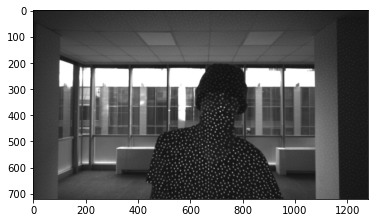

In [4]:
print(len(data))
print(data.head(3))

plt.imshow(cv2.imread(data['ir_full_path'][0]))

In [5]:
sess = everai.Session()





Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/filipgrigorov/anaconda3/envs/ml/lib/python3.7/site-packages/everai/models/graph/variables/variables


In [6]:
import numpy as np
num_found_faces = 0; counter = 1
for p in data['ir_full_path']:
    if isinstance(p, float) and np.isnan(p):
        continue
    ir_frame = cv2.imread(p)
    faces, top_i = sess.detect_bounding_boxes(ir_frame)
    if top_i >= 0:
        per = (counter / len(data)) * 100.0
        print('\rProcessing: {:.2f} %'.format(per), end='', flush=True)
        counter += 1
        num_found_faces += 1

Processing: 19.76 %